#Secom: fabricação de semicondutores

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_csv('Secom.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
data.shape

(1567, 591)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,618.000000,618.000000,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,0.0,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,1.938477,6.638628,69.499532,2.366197,0.184159,3.673189,85.337469,8.960279,50.582639,64.555787,49.417370,66.221274,86.836577,118.679554,...,1.230712,0.276688,7.703874,0.503657,57.746537,4.216905,1.623070,0.995009,0.325708,0.072443,32.284956,262.729683,0.679641,6.444985,0.145610,2.610870,0.060086,2.452417,21.117674,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.021615,0.016829,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,0.009302,0.012452,3.257276,0.0,2.796596,17.221095,2.403867,0.012062,2.781041,0.217965,0.016737,626.822178,295.498535,1380.162148,2902.690117,0.177600,0.189495,1.244249,3.461181,0.408694,0.032944,0.535322,2.026549,1.344456,1.182618,2.574749,1.182619,0.304141,0.446756,1.807221,...,1.361117,0.276231,2.192647,0.598852,35.207552,1.280008,1.870433,0.083860,0.201392,0.051578,19.026081,7.630585,0.121758,2.633583,0.081122,1.032761,0.032761,0.996644,10.213294,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.011730,0.009640,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,-0.034900,0.655400,182.094000,0.0,2.249300,333.448600,4.469600,0.579400,169.177400,9.877300,1.179700,-7150.250000,0.000000,-9986.750000,-14804.500000,0.000000,0.000000,0.000000,59.400000,0.666700,0.034100,2.069800,83.182900,7.603200,49.834800,63.677400,40.228900,64.919300,84.732700,111.712800,...,0.120000,0.018700,2.786000,0.052000,4.826900,1.496700,0.164600,0.891900,0.069900,0.017700,7.236900,242.286000,0.304900,0.970000,0.022400,0.412200,0.009100,0.370600,3.250400,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,-0.016900,0.003200,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,-0.005600,0.958100,198.130700,0.0,7.094875,406.127400,9.567625,0.968200,188.299825,12.460000,1.396500,-5933.250000,2578.000000,-4371.750000,-1476.000000,1.094800,1.906500,5.263700,67.377800,2.088900,0.161700,3.362700,84.490500,8.580000,50.252350,64.024800,49.421200,66.040650,86.578300,118.015600,...,0.870000,0.094900,6.738100,0.343800,27.017600,3.625100,1.182900,0.955200,

###Separar input e output

In [5]:
# output 
y_train = data[590]
y_train.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: 590, dtype: int64

In [6]:
# input 
X_train = data.iloc[:, 0:590]
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


##Pré Processamento

###Missing

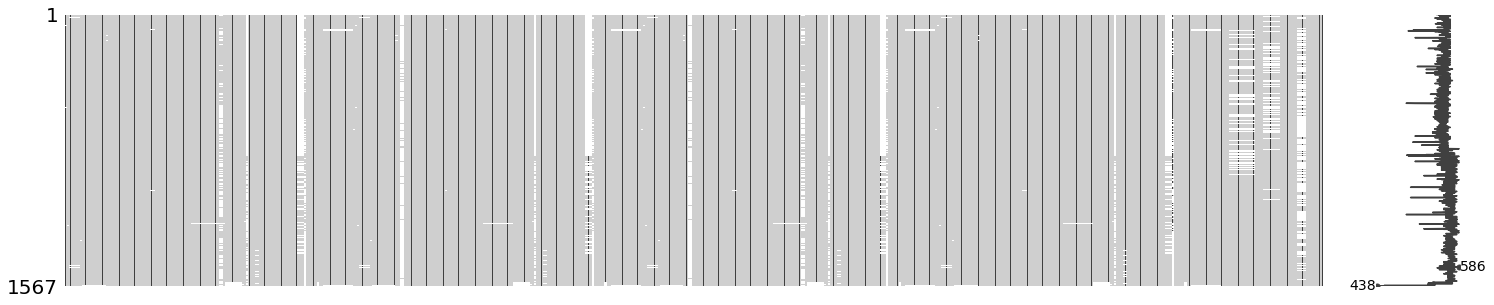

In [7]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

In [8]:
# Verificar missing por linha
percent_missing_rows = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), axis=1).sort_values(ascending=False)
df = pd.DataFrame({'row_index': X_train.index, 'percent_missing': percent_missing_rows})
df.head()

,row_index,percent_missing
1566,0,9.700064
1564,1,9.444799
1561,2,8.934269
1152,3,6.381621
511,4,6.381621


In [9]:
percent_missing = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), axis=0).sort_values(ascending=False)
df = pd.DataFrame({'column_name': X_train.columns, 'percent_missing': percent_missing})
df.head(35)

,column_name,percent_missing
158,0,91.193363
157,1,91.193363
292,2,91.193363
293,3,91.193363
220,4,85.577537
492,5,85.577537
85,6,85.577537
358,7,85.577537
245,8,64.964901
518,9,64.964901


In [10]:
# Classe tem missing?
y_train.isnull().sum()

0

In [11]:
# Atributos com muitos missing: serão deletados.
att_to_delete = df[0:32].index.values
att_to_delete

array([158, 157, 292, 293, 220, 492,  85, 358, 245, 518, 517, 516, 244,
       109, 110, 111, 384, 383, 382, 246, 578, 579, 580, 581,  72, 346,
       345,  73, 247, 519, 112, 385])

In [12]:
# deletar atributos
X_train.drop(att_to_delete, axis=1, inplace=True)
X_train.shape

(1567, 558)

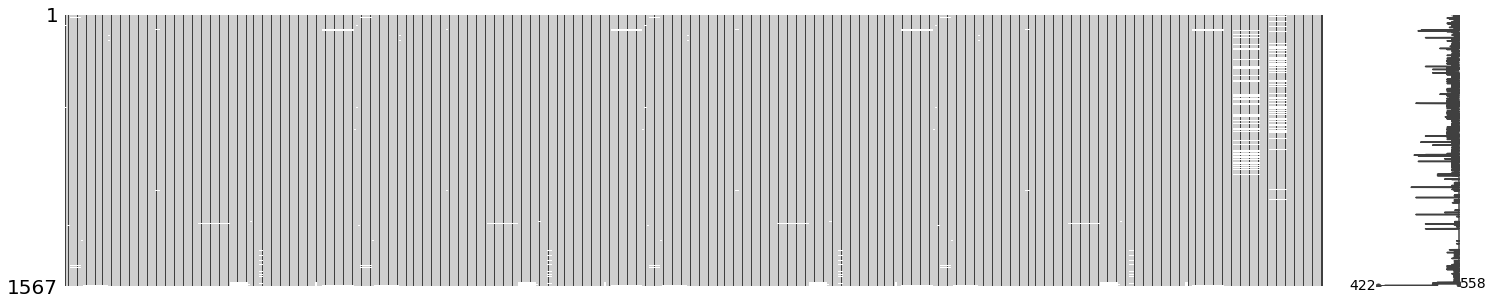

In [13]:
# visualizar novamente os missing
msno.matrix(X_train, figsize=(25,5));

In [14]:
# Imputar dados faltantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [15]:
# Verificar se temos mais algum missing
print(np.isnan(X_train).sum())

0


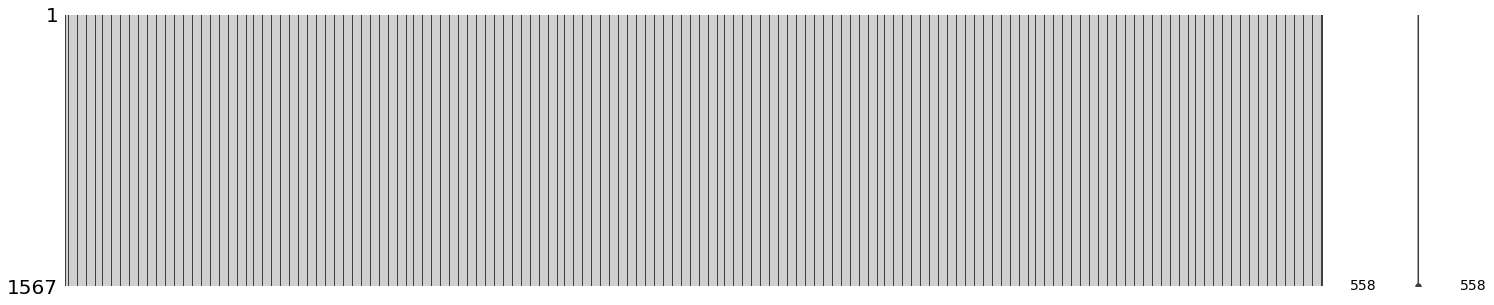

In [16]:
# visualizar novamente os missing
msno.matrix(pd.DataFrame(X_train), figsize=(25,5));

In [17]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

In [18]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

116

In [19]:
# novo shape
pd.DataFrame(X_train).shape

(1567, 442)

##Machine Learning

In [20]:
# treinar modelo
from sklearn.svm import LinearSVC

def trainSVM(X_train, y_train, seed):
  model = LinearSVC(max_iter= 10_000, random_state=seed)
  model.fit(X_train, y_train)
  return model

model = trainSVM(X_train, y_train, seed)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Avaliar modelo treinado na base de teste

In [21]:
# Carregar base de teste
test = pd.read_csv('Secom_teste.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
0,2940.50,2441.61,2205.2889,1630.3112,1.2733,100,98.8056,0.1218,1.3580,-0.0024,-0.0143,0.9659,200.3236,0,6.4351,392.4189,10.3512,0.9648,189.9724,12.3741,1.4191,-6345.75,2978.75,-4766.5000,1610.00,0.9955,1.8895,5.1878,66.2778,2.6778,0.2089,4.6686,86.3239,9.5642,50.3645,63.9038,49.6355,65.7964,86.4047,117.5064,...,0.69,0.0468,9.8882,0.3235,19.9053,5.5602,0.9214,0.9548,0.1898,0.0391,19.8740,264.984,0.8343,5.32,0.2812,2.7974,0.1113,2.0077,33.7022,531.5982,1.5656,8.55,0.2630,2.7800,0.0832,1.6084,16.8002,0.0334,0.0206,0.0067,61.6014,0.4981,0.0143,0.0038,2.8760,0.0334,0.0206,0.0067,61.6014,-1
1,3065.36,2162.87,2211.3889,1763.4015,1.6569,100,101.9133,0.1212,1.5337,-0.0010,-0.0018,0.9681,198.7876,0,7.0078,403.4078,9.4274,0.9735,189.3602,12.4578,1.3951,-6434.75,2976.00,-3654.6667,1290.75,0.9718,1.9065,5.2238,70.5333,2.1111,0.1596,4.7149,85.0841,8.6406,50.0757,63.7959,49.9243,66.0053,86.6776,118.5630,...,0.65,0.4550,6.6302,0.2384,79.3358,4.1328,0.8804,1.2606,0.1927,0.0369,15.2895,253.376,0.8441,12.60,0.1447,4.9898,0.0527,4.9728,17.1388,529.6709,2.4583,11.36,0.5263,3.9365,0.1473,2.1447,21.4110,0.0279,0.0123,0.0045,44.1754,0.5005,0.0163,0.0039,3.2621,0.0279,0.0123,0.0045,44.1754,-1
2,3038.21,2521.84,2273.7556,1549.8407,1.4105,100,105.0467,0.1171,1.3666,-0.0154,0.0047,0.9580,198.4092,0,14.1879,426.1956,10.0229,0.9678,188.3863,12.6063,1.3956,-6511.50,3124.00,-5585.0000,1369.00,0.9688,1.8875,5.0800,70.9778,2.3111,0.1493,4.6260,85.4820,9.3998,50.4069,64.2033,49.5931,66.3747,87.2029,118.3028,...,1.45,0.2925,5.3751,0.5947,59.7293,2.8368,1.9637,1.2338,0.4844,0.1180,39.2586,261.892,0.6847,7.25,0.0836,2.9035,0.0376,2.7683,12.2133,531.9191,1.7570,8.45,0.2756,3.0961,0.0740,1.5886,15.6838,NaN,NaN,NaN,NaN,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754,1
3,2912.76,2480.54,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.4029,0.0174,-0.0023,0.9759,198.8363,0,9.7333,418.6612,10.3441,0.9792,188.4922,12.4527,1.3943,-6403.75,3140.75,-4373.2500,1260.25,0.9692,1.8988,5.0717,68.1778,2.6444,0.1838,4.6163,86.3857,8.8513,50.1431,63.7749,49.8569,66.2673,87.0205,118.0906,...,1.39,0.4425,6.6585,0.6142,101.3962,3.5044,1.7114,0.9900,0.3120,0.0696,31.5183,247.870,0.6663,1.77,0.1193,0.6673,0.0556,0.7141,17.9031,535.9227,1.9110,8.65,0.1435,3.1242,0.0437,1.6140,7.5080,0.0095,0.0162,0.0063,170.5841,0.5040,0.0161,0.0043,3.1870,0.0095,0.0162,0.0063,170.5841,-1
4,3091.71,2548.95,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.5210,0.0075,-0.0127,0.9599,197.8643,0,7.6610,410.6937,10.2848,0.9674,187.5795,12.4600,1.4004,-5407.75,2579.50,-1945.0000,-874.75,1.2870,2.0082,7.2517,68.3222,2.5222,0.2116,3.3731,84.8399,8.5266,50.2925,64.0317,49.7075,66.1920,86.9240,117.9180,...,1.39,0.0649,6.1033,0.5522,21.6917,3.1766,1.8899,0.9289,0.1485,0.0312,15.9891,265.548,0.6107,7.50,0.1160,2.8915,0.0475,2.8243,19.0012,532.7000,2.3601,10.46,0.1936,3.7087,0.0595,1.9636,8.2046,0.0315,0.0164,0.0058,51.9199,0.5054,0.0127,0.0033,2.5175,0.0315,0.0164,0.0058,51.9199,-1


In [22]:
test.shape

(213, 591)

In [23]:
# Separar input e output
X_test = test.iloc[:,0:590]
y_test = test[590]

In [24]:
# Remover as mesmas colunas removidas do treino (com muitos valores faltantes)
X_test.drop(att_to_delete, axis=1, inplace=True)

# Aplicar tratamento de Missing
X_test = imputer.transform(X_test)

# remover as mesmas colunas removidas por variância zero
X_test = zero_var_filter.transform(X_test)

X_test.shape

(213, 442)

In [25]:
def predict_and_evaluate(X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['OK', 'Defeito']) 
  ax.yaxis.set_ticklabels(['OK', 'Defeito'])
  plt.show()

Acurácia:  0.9436619718309859
Kappa:  0.22262773722627738


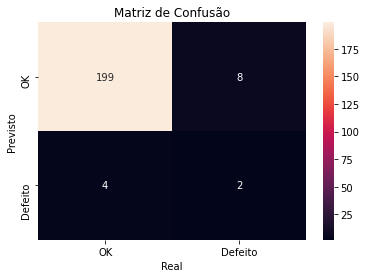

In [26]:
predict_and_evaluate(X_test, y_test)

###Balancear

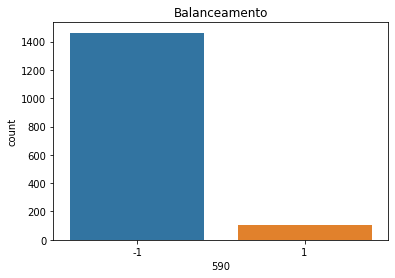

-1    1463
 1     104
Name: 590, dtype: int64


In [27]:
# Balanceamento
sns.countplot(data=pd.DataFrame(X_train), x=y_train)
plt.title('Balanceamento')
plt.show()
print(y_train.value_counts())

In [28]:
# https://github.com/scikit-learn-contrib/imbalanced-learn
# !pip install -U imbalanced-learn
# from imblearn.under_sampling import RandomUnderSampler
# sampler = RandomUnderSampler(random_state=seed);
# X_train, y_train = sampler.fit_resample(X_train, y_train)

# Usar a biblioteca acima é uma opção, mas não conseguimos configurar o sampling. No caso do undersampling, ele sempre reduzirá a classe majoritária para o tamanho da minoritária...
# Essa biblioteca tem diversos outros métodos para balanceamento.

In [29]:
y_train.value_counts()

-1    1463
 1     104
Name: 590, dtype: int64

In [30]:
train_data = np.column_stack((X_train,y_train))
np.random.shuffle(train_data)

ok = train_data[train_data[:,442] == -1,:]
defeito = train_data[train_data[:,442] == 1, :]

ok = ok[0:1200]

train_data = np.concatenate((ok, defeito))
np.random.shuffle(train_data)
train_data.shape

(1304, 443)

In [31]:
# Separar input e output
X_train = train_data[:,0:442]
y_train = train_data[:,442]

In [32]:
pd.DataFrame(y_train).value_counts()

-1.0    1200
 1.0     104
dtype: int64

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia:  0.9530516431924883
Kappa:  0.2660234321157823


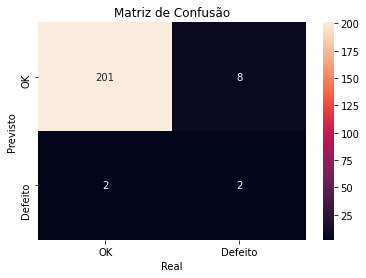

In [33]:
# treinar evaliar modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

###Normalizar

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


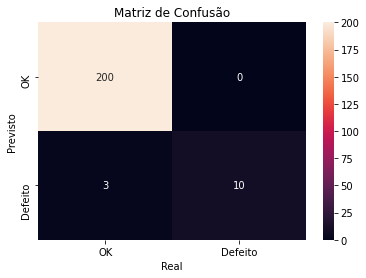

In [35]:
# treinar evaliar modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

###PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
df = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

            0
0    0.059503
1    0.097356
2    0.127889
3    0.154944
4    0.177359
5    0.198649
6    0.218830
7    0.238160
8    0.255188
9    0.271102
10   0.285917
11   0.300136
12   0.313982
13   0.327340
14   0.340317
15   0.352553
16   0.364716
17   0.376343
18   0.387590
19   0.398453
20   0.409251
21   0.419925
22   0.430159
23   0.440264
24   0.450202
25   0.460060
26   0.469399
27   0.478528
28   0.487588
29   0.496530
30   0.505374
31   0.513771
32   0.522081
33   0.530194
34   0.538259
35   0.546083
36   0.553787
37   0.561352
38   0.568816
39   0.576161
40   0.583424
41   0.590533
42   0.597492
43   0.604339
44   0.611094
45   0.617723
46   0.624222
47   0.630550
48   0.636840
49   0.642925
50   0.648927
51   0.654896
52   0.660735
53   0.666522
54   0.672245
55   0.677854
56   0.683401
57   0.688732
58   0.694028
59   0.699254
60   0.704406
61   0.709391
62   0.714356
63   0.719231
64   0.724038
65   0.728741
66   0.733332
67   0.737906
68   0.742365
69   0.746799
70   0

In [37]:
# 214
cut = 430
X_train = pca.transform(X_train)
X_train = X_train[:, 0:cut]
X_train.shape

(1304, 430)

In [38]:
X_test = pca.transform(X_test)
X_test = X_test[:, 0:cut]
X_test.shape

(213, 430)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


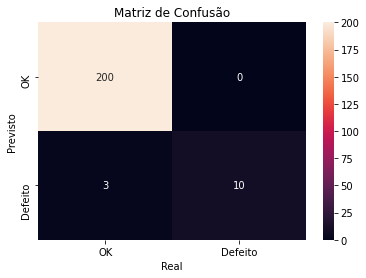

In [39]:
# treinar evaliar modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)